In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
def v_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 < y_2 or y_3 < y_2:
        return 0, 0

    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)


    return x, y

In [3]:
oog_src = r"E:\data\my data\February 2024 Arrhythmic\Fish 3 1.0gl\2024-02-22 13.50.09 vid\Allied Vision Technologies GS650 0001f61c\*tif"
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(oog_src)
oog.run()

Setting source to E:\data\my data\February 2024 Arrhythmic\Fish 3 1.0gl\2024-02-22 13.50.09 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Reference period: 117.5299848452046; Reference indices: [26, 150]
Getting SADs
Getting phases


In [4]:
data = tf.imread(oog_src)
data = OG.BasicOpticalGating().sequence_manager.load_tif(oog_src)

In [11]:
sads = []
for i in range(len(data)):
    sads.append(np.sum(np.abs(data[i].astype(np.int32) - oog.sequence_manager.reference_sequence[0].astype(np.int32))))

In [12]:
sads = -np.array(sads)
sads -= np.min(sads)

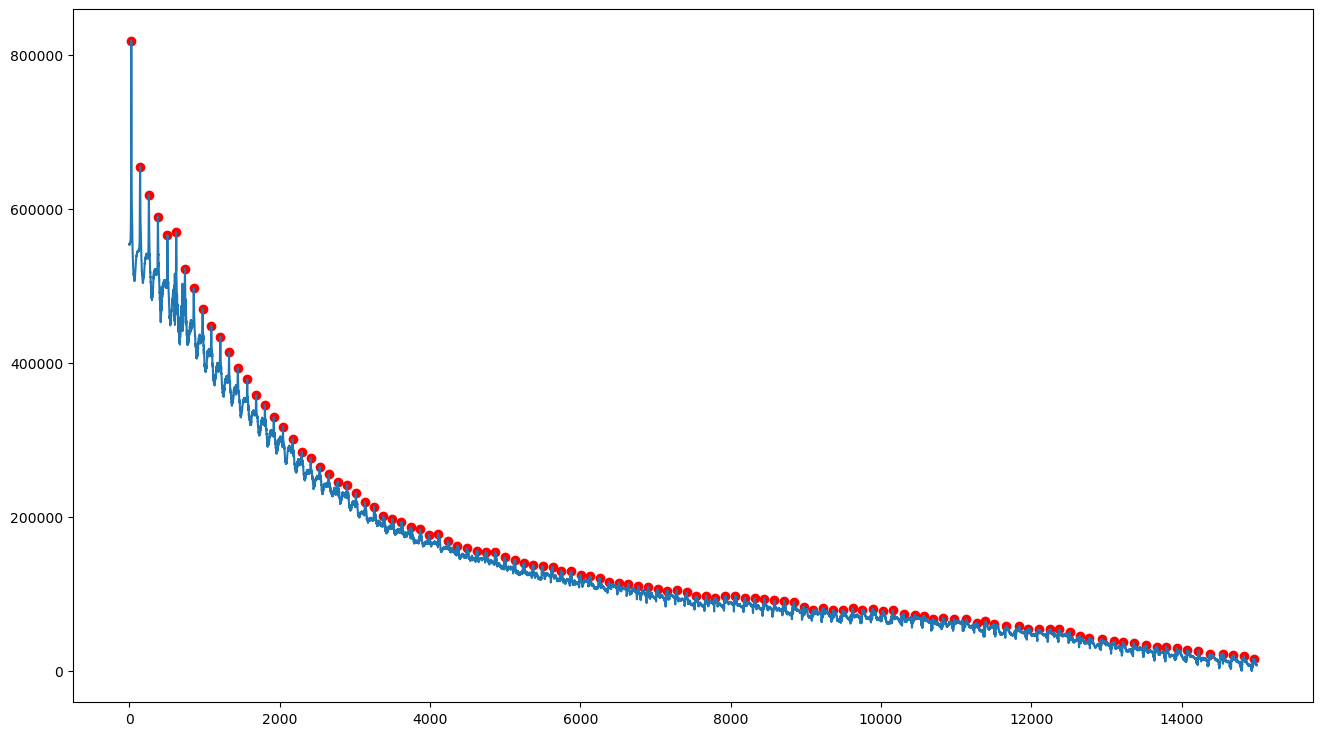

In [13]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(sads, height = 10000, distance = 100)

plt.figure(figsize=(16,9))
plt.plot(sads)
for peak in peaks:
    plt.scatter(peak, sads[peak], c = "r")
plt.show()

In [14]:
reference_indices = []
reference_periods = []

for i in range(1, len(peaks) - 2):
    first_subframe = v_fitting(-sads[peaks[i] - 1], -sads[peaks[i]], -sads[peaks[i] + 1])
    last_subframe = v_fitting(-sads[peaks[i + 1] - 1], -sads[peaks[i + 1]], -sads[peaks[i + 1] + 1])

    reference_indices.append((peaks[i] - 2, peaks[i + 1] + 2))
    reference_periods.append((peaks[i + 1] + last_subframe[0]) - (peaks[i] + first_subframe[0]))


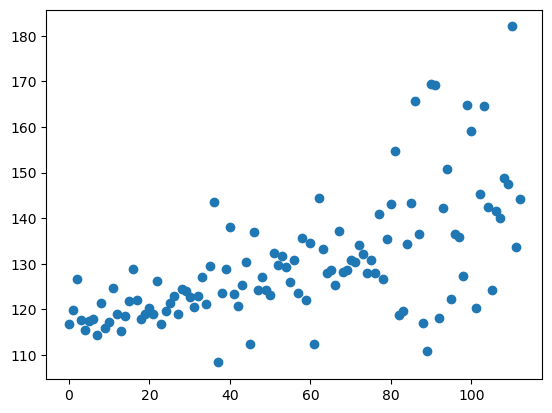

In [15]:
plt.scatter(range(len(reference_periods)), reference_periods)

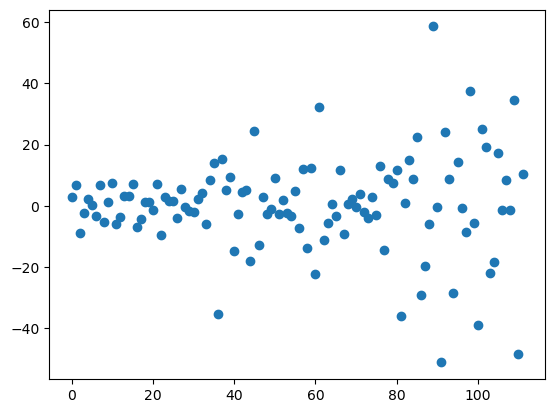

In [18]:
plt.scatter(range(len(np.diff(reference_periods))), np.diff(reference_periods))

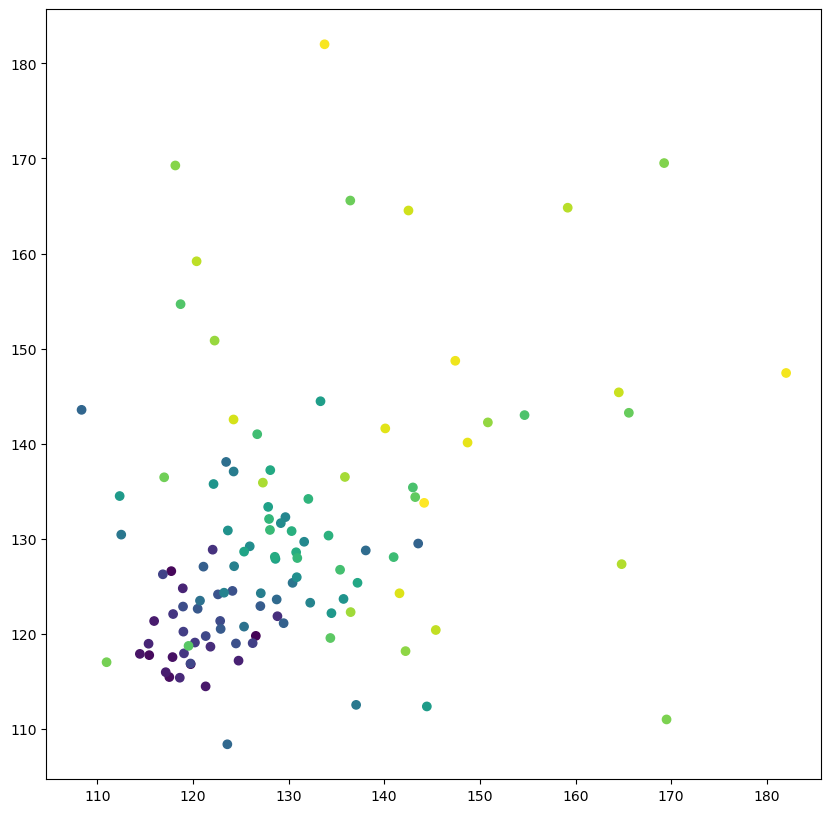

In [16]:
plt.figure(figsize = (10,10))
plt.scatter(reference_periods[1::], reference_periods[0:-1], c = range(len(reference_periods) - 1))

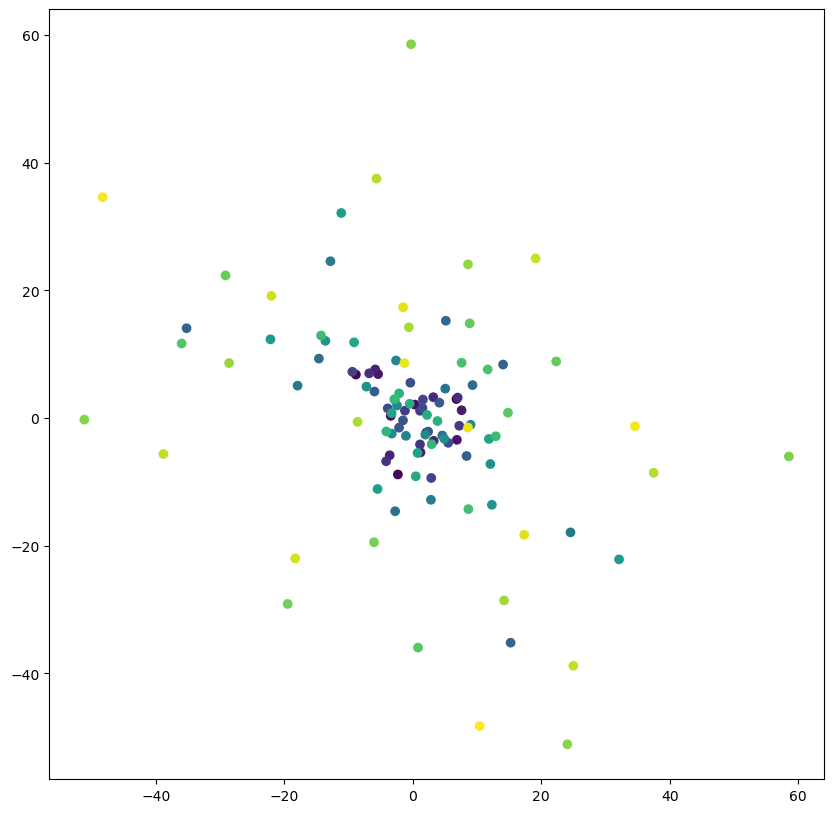

In [17]:
plt.figure(figsize = (10,10))
plt.scatter(np.diff(reference_periods[1::]), np.diff(reference_periods[0:-1]), c = range(len(reference_periods) - 2))